# Introduction to jupyter notebooks and how to access SASIP data



---
## 1. (Very) quick intro to jupyter notebooks

* For detailed documentation, see here: https://jupyter-notebook.readthedocs.io/en/stable/.

* **In short, in a jupyter notebook, each "cell" like this one  is either for python code (or bash command) or just for text (in markdown).**

* An example of a code cell is given below. You can run by clicking on the "play" triangle above, or do __SHIFT+ENTER__ after selecting the cell to run:

In [1]:
# this is python code:

a = 4
b = 5
c = a+b
print(c)

9


* you can import python packages this way:

In [2]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import HTML

#JUPYTER notebook magics
%matplotlib inline 

* you can also run `bash` commands by starting the given cell by `%%bash` :

In [3]:
%%bash

ls -lt

total 36
-rw-r--r-- 1 jovyan pr-sasip 10467 Jun 26 20:00 3-Plot-model-outputs.ipynb
-rw-r--r-- 1 jovyan pr-sasip  2151 Jun 26 20:00 4-Tuto-to-SAVE-via-GITHUB.ipynb
-rw-r--r-- 1 jovyan pr-sasip  6343 Jun 26 20:00 1-Intro-jupyter-and-data.ipynb
-rw-r--r-- 1 jovyan pr-sasip  9233 Jun 26 20:00 2-Prepare-and-run-NeXtSIM-DG-testcase.ipynb


---
## 2. How to access SASIP data ?

Easy ! It has been mounted to be accessed in this cloud session. Just have a look at  `/data/`:

In [4]:
ls /data/

grids/                  model-configurations/  model-outputs/  README.md*
machine-learning-data/  model-forcings/        observations/


* You can navigate through the data (also documented in the SASIP catalog (https://github.com/sasip-climate/catalog-shared-data-SASIP/blob/main/catalog-details.md).

For example, lets have a look at : `/data/model-outputs/neXtSIM-standalone/` (some model outputs produced with the Lagrangian version of the sea ice model NeXtSIM):

In [5]:
ls /data/model-outputs/neXtSIM-standalone/

Moorings_2006d031-041_spinup.nc  Moorings_2006d049.nc  Moorings_2006d057.nc
Moorings_2006d042.nc             Moorings_2006d050.nc  Moorings_2006d058.nc
Moorings_2006d043.nc             Moorings_2006d051.nc  Moorings_2006d059.nc
Moorings_2006d044.nc             Moorings_2006d052.nc  Moorings_2006d060.nc
Moorings_2006d045.nc             Moorings_2006d053.nc  Moorings_2006d061.nc
Moorings_2006d046.nc             Moorings_2006d054.nc  Moorings_2006d062.nc
Moorings_2006d047.nc             Moorings_2006d055.nc
Moorings_2006d048.nc             Moorings_2006d056.nc


* Now let's load one of those files (let's load the sea ice "damage" for example):

In [6]:
diridat = "/data/model-outputs/neXtSIM-standalone/"
fili    = "Moorings_2006d062.nc"

dam = xr.open_dataset(diridat+fili)
dam

<xarray.Dataset>
Dimensions:                   (time: 1, nv: 2, y: 1256, x: 1073)
Coordinates:
  * time                      (time) datetime64[ns] 2006-03-03
Dimensions without coordinates: nv, y, x
Data variables:
    Polar_Stereographic_Grid  int32 ...
    time_bnds                 (time, nv) datetime64[ns] ...
    longitude                 (y, x) float32 ...
    latitude                  (y, x) float32 ...
    siu                       (time, y, x) float32 ...
    siv                       (time, y, x) float32 ...
    sic                       (time, y, x) float32 ...
    damage                    (time, y, x) float32 ...
    ridge_ratio               (time, y, x) float32 ...
    sit                       (time, y, x) float32 ...
Attributes:
    Conventions:  CF-1.6
    institution:  NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    source:       neXtSIM model fields

* Plot it

<function matplotlib.pyplot.show(close=None, block=None)>

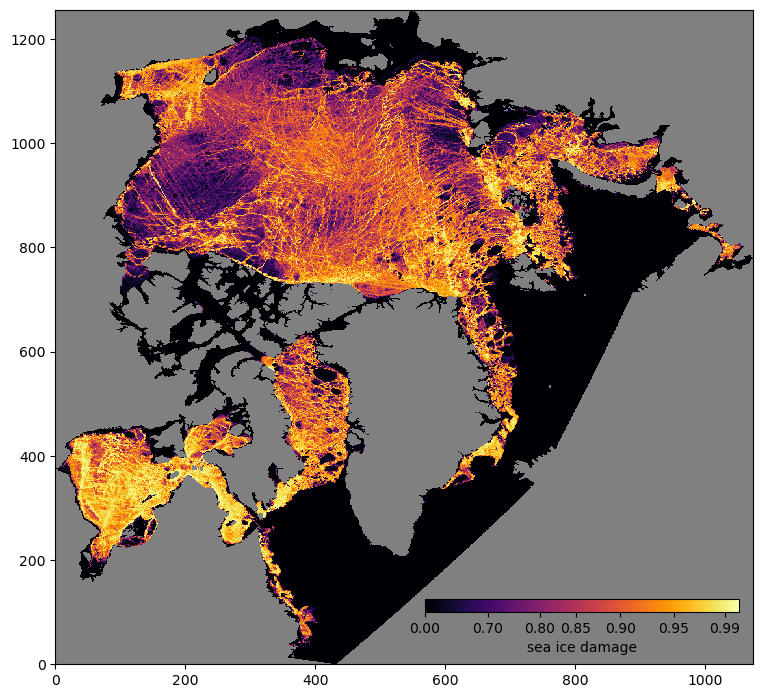

In [7]:
it=0
data2plt = dam["damage"].isel(time=0)
data2plt_masked = data2plt.where((data2plt<100))

cmap = cm.inferno
cmap.set_bad('gray',1.)

norm = mcolors.PowerNorm(gamma=4.5,vmin=0, vmax=1)

fig,(ax) = plt.subplots(1, 1, figsize=[9, 8.5],facecolor='w')

p = ax.pcolormesh(data2plt,cmap=cmap,norm=norm)

#plt.colorbar(p,label='sea ice damage',extend='both')

# colorbar
cblev=[0,0.7,0.8,0.85,0.9,0.95,0.99]
axins1 = inset_axes(ax,
                        height="10%",  # height : 5%
                            width="50%",
                        bbox_to_anchor=(0.08, -0.1,0.9,0.2),
                        bbox_transform=ax.transAxes,
                        borderpad=0)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=axins1, orientation='horizontal',ticks=cblev,label='sea ice damage')

plt.show

---
## 3. What's next ?

--> You can now learn how to run neXtSIM-DG with the [next notebook (2-Prepare-and-run-NeXtSIM-DG-testcase.ipynb)](2-Prepare-and-run-NeXtSIM-DG-testcase.ipynb) 